## Week 6: Dimensionality Reduction

**(1a) Load the data file 'data1.csv' and visualize the data.**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("./data1.csv",header=None)
df.head()

,0,1
0,-3.086760,0.012814
1,2.368870,-0.056970
2,-0.741769,0.089533
3,-1.221298,0.145294
4,-2.080397,0.118519


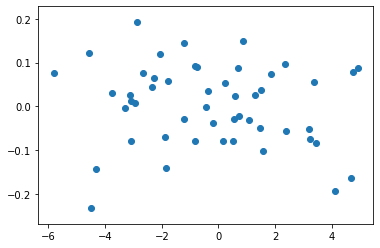

In [3]:
plt.scatter(df[0],df[1])
plt.show()

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [4]:
#loss
#Dropping feature 1
dropping_1=np.sum(df.iloc[:,0]**2)
#Dropping feature 2
dropping_2=np.sum(df.iloc[:,1]**2)
print("Loss on dropping feature1:{}".format(dropping_1))
print("Loss on dropping feature2:{}".format(dropping_2))
print("Hence dropping feature 2 due to lower loss")

Loss on dropping feature1:358.1035064241587
Loss on dropping feature2:0.4191265524458239
Hence dropping feature 2 due to lower loss


**(1c) Visualize the approximated data and compare it with the original data.**

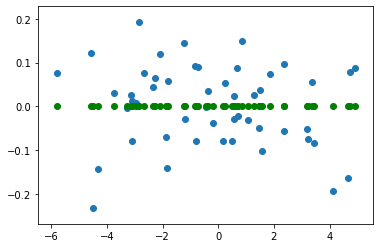

In [5]:
plt.scatter(df[0],df[1])
plt.scatter(df[0],np.zeros(len(df[0])),color='g')
plt.show()

**(2a) Load the data file 'data2.csv'.**

In [6]:
df = pd.read_csv("./data2.csv",header=None)
df.head()

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


**(2c) Plot the minimum representation loss as a function of the number of features used for representation.**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

Order of features in increasing order of significance:['x4', 'x1', 'x2', 'x3']


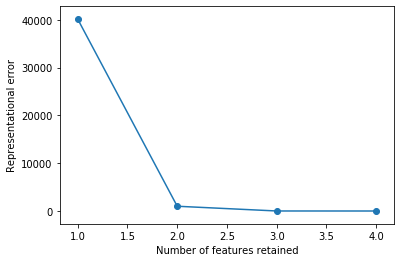

In [7]:
drop = []
feat = ['x1','x2','x3','x4']
for i in range(4):
    loss = (df.iloc[:,i]**2).sum().sum()
    drop.append(loss)
index=np.argsort(drop)
drop_sorted = np.sort(drop)
feature_imp = [feat[i] for i in index]
print("Order of features in increasing order of significance:{}".format(feature_imp))

#Plot vs number of features
loss = []
for i in range(4):
    loss.append(np.sum(drop_sorted[:i]))

#plotting
plt.plot(np.arange(4,0,step=-1),loss)
plt.scatter(np.arange(4,0,step=-1),loss)
plt.xlabel("Number of features retained")
plt.ylabel("Representational error")
plt.show()

**(2d) Compute the covariance matrix of the $m$ features. Comment with respect to (2c).**

In [8]:
print(np.cov(df.values.T))

[[ 9.87196296e-01 -5.71788428e-02 -1.40990871e-01  3.05657061e-03]
 [-5.71788428e-02  3.91821903e+01  1.16676059e-01 -7.77027357e-03]
 [-1.40990871e-01  1.16676059e-01  1.00898980e+03  5.58349417e-02]
 [ 3.05657061e-03 -7.77027357e-03  5.58349417e-02  5.09299247e-03]]


We can see that x4 has the least variance hence it can be termed as least important amongst all other features. After it comes x1 with second least variance. Then x2 and x3. Hence we can say that features with very less variance , removing them will give least representation loss.

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of the $m$ features.**

In [9]:
df = pd.read_csv("./data3.csv",header=None)
df.head()

,0,1
0,-2.173608,-2.191730
1,1.634760,1.715328
2,-0.461201,-0.587819
3,-0.760849,-0.966327
4,-1.387257,-1.554868


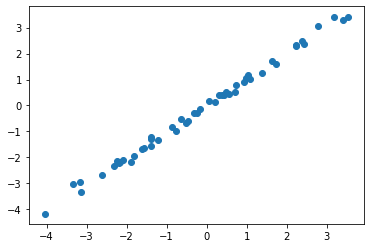

In [10]:
plt.scatter(df[0],df[1])
plt.show()

In [18]:
#Covariance matrix C
print(np.cov(df.values.T))

[[3.59416569 3.61756379]
 [3.61756379 3.65805865]]


**(3c) Uncorrelate the covariance matrix $C$ using an orthonormal transformation (rotation).**

In [19]:
#finding slope
COV = np.cov(df.values.T)
slope = COV[0,1]/COV[0,0]
#For uncorrelating , we need to rotate, finding rotation matrix
angle = np.arctan(slope)
rot_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
#Rotation the correlation matrix by rot.T*corr_matrix*rot
rot_corr_matrix = np.dot(rot_matrix.T,np.dot(np.cov(df.values.T),rot_matrix))
#Uncorrleated covariance matrix
print("Uncorrelated covariance matrix:\n{}".format(rot_corr_matrix))
#Rotation matrix
print("Rotation matrix:\n{}".format(rot_matrix))

Uncorrelated covariance matrix:
[[7.2438071  0.00847204]
 [0.00847204 0.00841725]]
Rotation matrix:
[[ 0.7048089  -0.70939722]
 [ 0.70939722  0.7048089 ]]


In [20]:
#Almost same result using Singular Vector decomposition
U,S,V=np.linalg.svd(df.values/np.sqrt(len(df)))
print("Variance along principle components:\n{}".format(np.diag(S**2)))

Variance along principle components:
[[7.16221217 0.        ]
 [0.         0.00824049]]


**(3d) Apply the transformation to the data points. Now, visualize the data points.**

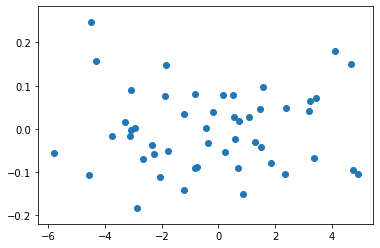

In [21]:
X_rot = np.dot(df.values,rot_matrix)
plt.scatter(X_rot[:,0],X_rot[:,1])
plt.show()

**(3e) Find a one-dimensional representation of the data such that the representation loss is minimum.**

**(3f) Reverse the (rotation) transformation on the approximated data and visualize the data.**

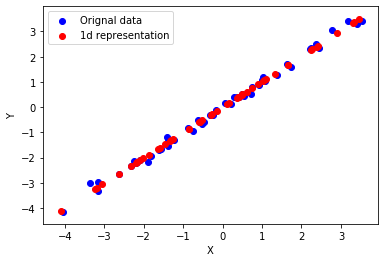

In [22]:
#Taking feature 1 of X_rot as it minimize representation loss and converting Y to 0 for plotting purpose
X_1d=X_rot.copy()
#Only 1st feature considered
X_1d[:,1] = 0
#Reversing the rotation
X_1d_rot = np.dot(X_1d,rot_matrix.T)
#Plotting the rotated version
plt.scatter(df[0],df[1],color='blue')
plt.scatter(X_1d_rot[:,0],X_1d_rot[:,1],color='red')
plt.legend(["Orignal data","1d representation"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**(3e) Compute the representational loss (with respect to the original data).**

**(3f) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [23]:
#(3e)Representation loss between data and data_1d_rotat
print("Representation loss with transformation:{}".format(np.sum(np.sum((df-X_1d_rot)**2))))
#(3f)Representation without any transformation
#Removing feature 1
print("Representation loss without transformation after removing feature1:{}".format(np.sum((df[0])**2)))
#Removing feature 2
print("Representation loss without transformation after removing feature2:{}".format(np.sum((df[1])**2)))

Representation loss with transformation:0.4125496263496273
Representation loss without transformation after removing feature1:177.66749559601547
Representation loss without transformation after removing feature2:180.85513738058907


If features are correlated then we cant remove features directly without transformation as it will give huge representation loss. On decorrelating the features and removing one features gives best representation. We confirm this by the loss with and without transformation 

**(4a) Load the data file 'data4.csv'.**

**(4b) Plot the representation loss as a function of the number of features (in the transformed domain) used for representation.**

In [24]:
df = pd.read_csv("./data4.csv",header=None)
df.head()

,0,1,2,3
0,0.886636,5.414102,5.414102,-0.050537
1,1.571465,-4.373945,-4.373945,-0.046006
2,0.344091,-13.850319,-13.850319,-0.008261
3,-1.904044,-0.465430,-0.465430,-0.104967
4,0.321489,-1.487056,-1.487056,0.009423


In [25]:
#decorrelating 
#Since its difficult to find the rotation matrix we find use eigen value decomposition
U,S,V=np.linalg.svd(df.values/np.sqrt(len(df)))
print("Variance along principle components:\n{}".format(np.diag(S**2)))
#Here V.T contains the eigenvectors or principle components

Variance along principle components:
[[8.25118887e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.62756871e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.07640236e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.74394461e-16]]


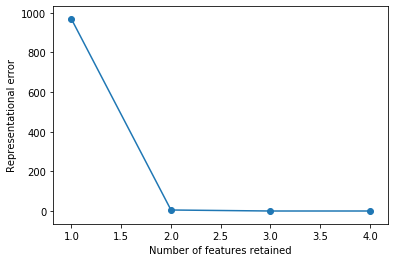

In [26]:
drop = []
for i in range(4):
    #Taking the first i+1 principle components as features
    principle_comp = np.matrix(V[0:i+1,:].T)
    X_transformed = np.dot(df.values,principle_comp)
    #To get back from X_transformed to original dimension we multiply with principle_comp.T
    loss = np.sum(np.sum(np.array(np.dot(X_transformed,principle_comp.T) - df.values)**2))
    drop.append(loss)

#plotting
plt.plot(np.arange(1,5),drop)
plt.scatter(np.arange(1,5),drop)
plt.xlabel("Number of features retained")
plt.ylabel("Representational error")
plt.show()

# Application

**(5a) Load the human face data set given below.**

In [70]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

** faces.data should contain vectorized 1-D images. faces.images should contain 2-D images.**

**(5b) Visualize the data set.**

<Figure size 432x288 with 0 Axes>

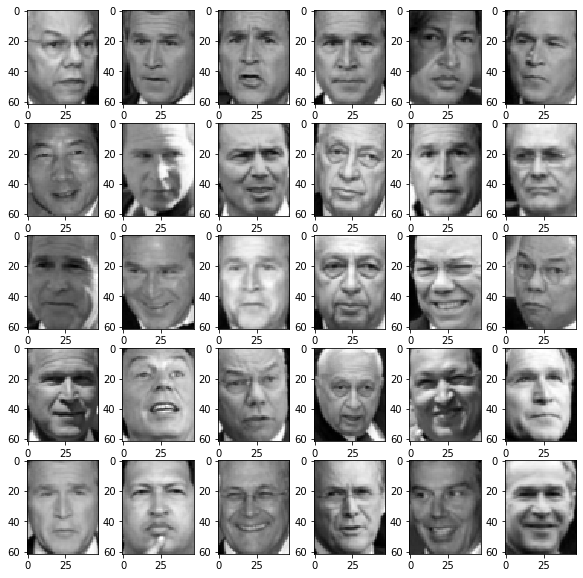

In [115]:
plt.gray()
fig = plt.figure(figsize = [10,10])
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(faces.images[i])

**(5c) Take faces.data and apply PCA. **

**(5c) Take the top 150 features from PCA. Reconstruct the images with the top 150 features and visualize it. Comment.**

<Figure size 432x288 with 0 Axes>

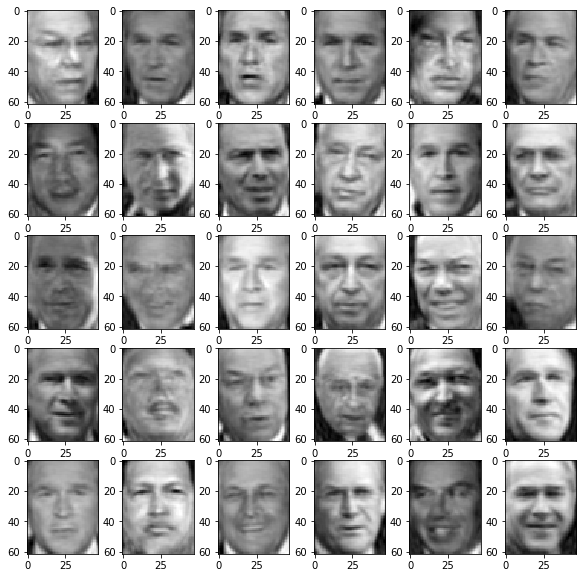

In [135]:
#Applying PCA 
pca_model=PCA(n_components=150).fit(faces.data)
top_components=pca_model.components_
#Reconstruction images
recons_data=np.dot(np.dot(faces.data,top_components.T),top_components)
#reshaping into images
recons_images=np.reshape(recons_data,np.shape(faces.images))

#Visualizing images
plt.gray()
fig = plt.figure(figsize = [10,10])
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(recons_images[i])

We can clearly see that the reconstructed images are lighter than real images. Also 150 features are perfectly able to capture all the features of the face. The faces are also slightly blurry but we can see that this representation has not incurred much representation loss

**(5d) Consider any two classes (categories, e.g., humans) from the data set. Compare the performance of logistic regression with and without PCA. Comment on the classification accuracy. (Optional). **